# Spatio-temporal zonal analysis

In [ ]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

import pylandstats as pls

In order to perform zonal analyses over time, PyLandStats features an additional `SpatioTemporalZonalAnalysis` analysis class - as well as `SpatioTemporalBufferAnalysis` and `SpatioTemporalZonalGridAnalysis`.

Like in the [spatio-temporal analysis example](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/02-spatiotemporal-analysis.ipynb), we will use the three extracts of [Veveyse district](https://en.wikipedia.org/wiki/Veveyse_District) from the [Swiss Land Statistics (SLS) datasets from the Swiss Federal Statistical Office](https://www.bfs.admin.ch/bfs/en/home/services/geostat/swiss-federal-statistics-geodata/land-use-cover-suitability/swiss-land-use-statistics.html) for the years 1992, 2004 and 2012, yet in this case we also need to specify how the buffers are constructed.

We first need to run the cell below so that:
- the land use/land cover (LULC) data is downloaded and preprocessed (see [A03-swisslandstats-preprocessing.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/A03-swisslandstats-preprocessing.ipynb) for more details).
- the elevation zones vector data is downloaded and preprocessed (see [A04-elev-zones.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/A04-elev-zones.ipynb) for more details).

In [ ]:
!snakemake -c1 -d .. -s ../Snakefile lulc_tifs elev_zones

Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2024-05-01T094637.742453.snakemake.log


## Spatio-temporal zonal analysis

Besides the base LULC maps, we will use a geopackage file defining a set of elevation zones. Like with the `ZonalAnalysis` class, we can use the `zone_index` argument to indicate which column of the geopackage file will be used to index the zones:

In [ ]:
URBAN_CLASS_VAL = 1
input_filepaths = [
    "../data/processed/veveyse-AS97R_4.tif",
    "../data/processed/veveyse-AS09R_4.tif",
    "../data/processed/veveyse-AS18_4.tif",
]
years = ["1992", "2004", "2012"]
elev_zones_filepath = "../data/processed/elev-zones.gpkg"

stza = pls.SpatioTemporalZonalAnalysis(
    input_filepaths, elev_zones_filepath, zone_index="elev-zone", dates=years
)

Like `SpatioTemporalAnalysis`, `BufferAnalysis` and/or `ZonalAnalysis`, we can compute the data frame of class metrics through the `compute_class_metrics_df` method:

In [ ]:
class_metrics_df = stza.compute_class_metrics_df()
class_metrics_df.head()

[                                        ] | 0% Completed | 1.81 s ms

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[#############                           ] | 33% Completed | 2.60 s

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[########################################] | 100% Completed | 3.42 s


total_area  proportion_of_landscape  \
class_val elev-zone date                                        
1         <1000     1992       680.0                 8.369231   
                    2004       786.0                 9.673846   
                    2012       911.0                11.212308   
          1000-1500 1992       101.0                 2.213456   
                    2004       108.0                 2.366864   

                          number_of_patches  patch_density  \
class_val elev-zone date                                     
1         <1000     1992                250       3.076923   
                    2004                249       3.064615   
                    2012                232       2.855385   
          1000-1500 1992                 49       1.073855   
                    2004                 47       1.030024   

                          largest_patch_index  total_edge  edge_density  \
class_val elev-zone date                                                  
1         <1000     1992             0.984615    191300.0     23.544615   
                    2004             1.144615    205700.0     25.316923   
                    2012             2.289231    219200.0     26.978462   
          1000-1500 1992             0.372562     31200.0      6.837607   
                    2004             0.416393     31000.0      6.793776   

                          total_core_area  core_area_proportion_of_landscape  \
class_val elev-zone date                                                       
1         <1000     1992             27.0                           0.332308   
                    2004             48.0                           0.590769   
                    2012             87.0                           1.070769   
          1000-1500 1992              1.0                           0.021915   
                    2004              2.0                           0.043831   

                          number_of_disjunct_core_areas  ...  \
class_val elev-zone date                                 ...   
1         <1000     1992                              9  ...   
                    2004                             10  ...   
                    2012                             17  ...   
          1000-1500 1992                              1  ...   
                    2004                              2  ...   

                          euclidean_nearest_neighbor_md  \
class_val elev-zone date                                  
1         <1000     1992                     223.606798   
                    2004                     223.606798   
                    2012                     223.606798   
          1000-1500 1992                     300.000000   
                    2004                     316.227766   

                          euclidean_nearest_neighbor_ra  \
class_val elev-zone date                                  
1         <1000     1992                     581.024968   
                    2004                     581.024968   
                    2012                     561.577311   
          1000-1500 1992                    2216.609195   
                    2004                    2216.609195   

                          euclidean_nearest_neighbor_sd  \
class_val elev-zone date                                  
1         <1000     1992                     114.225158   
                    2004                     111.658845   
                    2012                     109.128542   
          1000-1500 1992                     355.941215   
                    2004                     442.227644   

                          euclidean_nearest_neighbor_cv  \
class_val elev-zone date                                  
1         <1000     1992                      41.006394   
                    2004                      40.706115   
                    2012                      39.692040   
          1000-1500 1992                      85.601955   
   

Note that in this case, the data frame features a three-level [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html) that distinguishes the computed value for each class, zone and date. Again, we can operate upon such data frames as we would do with any other pandas data frame. For instance, we might want to evaluate the difference between the proportion of landscape occupied of urban patches (represented by a `class_val` of 1) computed for the elevation zone of "<1000" and ">1500":

In [ ]:
(
    class_metrics_df.loc[(1, "<1000"), "proportion_of_landscape"]
    - class_metrics_df.loc[(1, ">1500"), "proportion_of_landscape"]
)

date
1992     7.947290
2004     9.251905
2012    10.790367
Name: proportion_of_landscape, dtype: float64

Likewise in the other classes of PyLandStats, if we want to compute the metrics data frame only for a subset of metrics or classes, or customize how the metrics are computed, we must respectively pass the arguments `metrics`, `classes` or `metrics_kwargs` to the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods of `SpatioTemporalZonalAnalysis` as in:

In [ ]:
metrics = ["proportion_of_landscape", "edge_density", "fractal_dimension_am"]
classes = [URBAN_CLASS_VAL]
metrics_kwargs = {
    "proportion_of_landscape": {"percent": False},
    "edge_density": {"count_boundary": True},
}
stza.compute_class_metrics_df(
    metrics=metrics, classes=classes, metrics_kwargs=metrics_kwargs
)

[########################################] | 100% Completed | 102.89 ms


proportion_of_landscape  edge_density  \
class_val elev-zone date                                          
1         <1000     1992                 0.083692     23.876923   
                    2004                 0.096738     25.698462   
                    2012                 0.112123     27.470769   
          1000-1500 1992                 0.022135      6.925268   
                    2004                 0.023669      6.969099   
                    2012                 0.025641      7.232084   
          >1500     1992                 0.004219      1.687764   
                    2004                 0.004219      1.687764   
                    2012                 0.004219      1.687764   

                          fractal_dimension_am  
class_val elev-zone date                        
1         <1000     1992              1.086550  
                    2004              1.092837  
                    2012              1.119244  
          1000-1500 1992              1.067187  
                    2004              1.068350  
                    2012              1.067263  
          >1500     1992              1.000000  
                    2004              1.000000  
                    2012              1.000000

Another important functionality of the `SpatioTemporalZonalAnalysis` is plotting the time series of metrics at each zone. We can accomplish that through the `plot_metric` method. For instance, let us plot the proportion of landscape at the level of the *urban* class (`class_val` of 1):

[########################################] | 100% Completed | 101.30 ms


<Axes: ylabel='PLAND'>

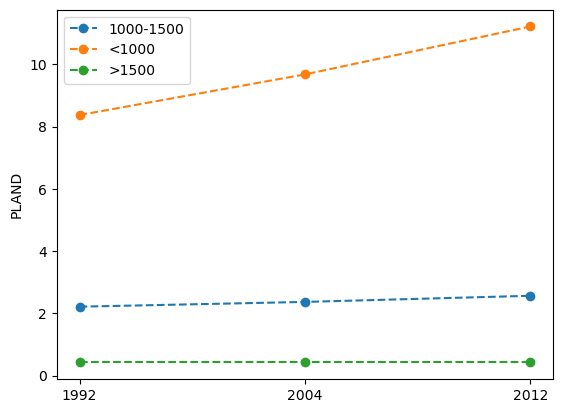

In [ ]:
stza.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

It can also be interesting to visualize such information in space by using `compute_zonal_statistics_gdf` method to obtain a geo-data frame:

In [ ]:
zonal_statistics_gdf = stza.compute_zonal_statistics_gdf(
    metrics=metrics, class_val=URBAN_CLASS_VAL
)
zonal_statistics_gdf

[########################################] | 100% Completed | 101.85 ms


edge_density                       fractal_dimension_am            \
date              1992       2004       2012                 1992      2004   
elev-zone                                                                     
1000-1500     6.837607   6.793776   7.056761             1.067187  1.068350   
<1000        23.544615  25.316923  26.978462             1.086550  1.092837   
>1500         1.054852   1.054852   1.054852             1.000000  1.000000   

                    proportion_of_landscape                       \
date           2012                    1992      2004       2012   
elev-zone                                                          
1000-1500  1.067263                2.213456  2.366864   2.564103   
<1000      1.119244                8.369231  9.673846  11.212308   
>1500      1.000000                0.421941  0.421941   0.421941   

                                                    geometry  
date                                                          
elev-zone                                                     
1000-1500  POLYGON ((2563900.000 1160700.000, 2563900.000...  
<1000      MULTIPOLYGON (((2560900.000 1150500.000, 25607...  
>1500      MULTIPOLYGON (((2566300.000 1151500.000, 25665...

Note that the columns of the geo-data frame are indexed in two levels, namely the metrics and dates. Since now we have a time series of values, we can spatially plot the evolution of the metrics at each zone:

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


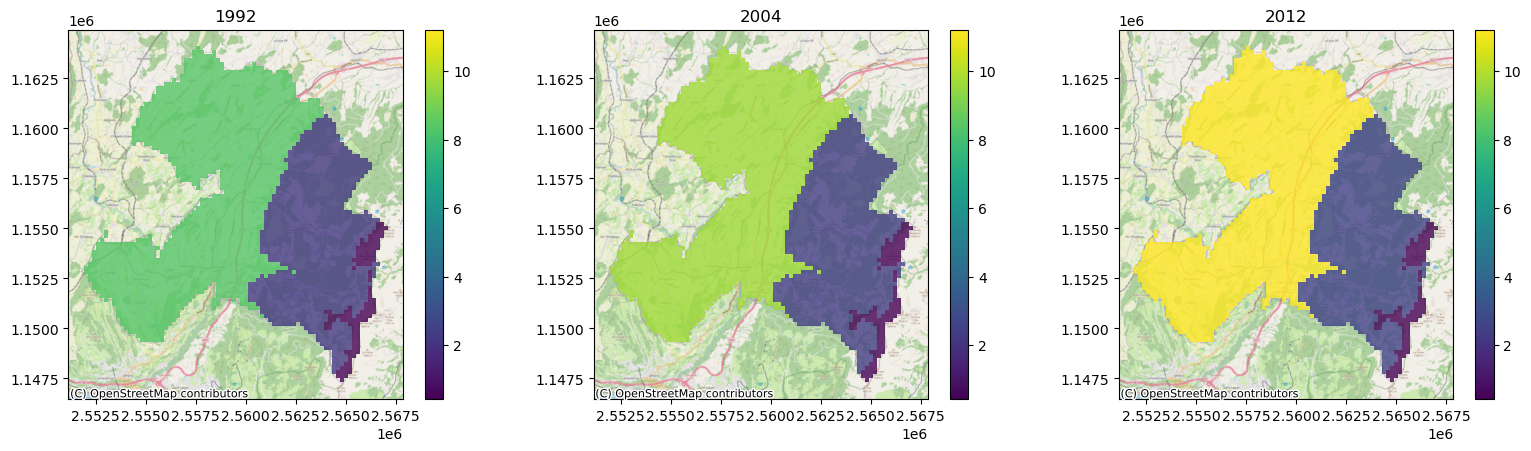

In [ ]:
num_years = len(years)
figwidth, figheight = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, num_years, figsize=(num_years * figwidth, figheight))

# get min and max values for all years to have the same scale accross plots
vmin = zonal_statistics_gdf["proportion_of_landscape"].min().min()
vmax = zonal_statistics_gdf["proportion_of_landscape"].max().max()
for year, ax in zip(years, axes):
    zonal_statistics_gdf.plot(
        ("proportion_of_landscape", year),
        ax=ax,
        alpha=0.8,
        legend=True,
        vmin=vmin,
        vmax=vmax,
    )
    ax.set_title(year)
    cx.add_basemap(
        ax, crs=zonal_statistics_gdf.crs, source=cx.providers.OpenStreetMap.Mapnik
    )

In fact, we can apply any transformation to the geo-data frame to visualize the metrics as required. For instance, we can transform the data frame to have separate columns for each year (how this is accomplished is beyond the scope of this tutorial), so that we can explore all the metrics values in the map:

In [ ]:
plot_gdf = zonal_statistics_gdf.copy()  # drop("geometry", axis=1).unstack()
plot_gdf.columns = plot_gdf.columns.to_flat_index().map(lambda tup: "-".join(tup))
plot_gdf = gpd.GeoDataFrame(
    plot_gdf,
    geometry=plot_gdf.reset_index()["elev-zone"].map(stza.zone_gser).values,
    crs=stza.zone_gser.crs,
)
plot_gdf.explore()

## Spatiotemporal buffer analysis

Let us now consider three buffers of 2, 4 and 6km around the center of the town of Chatel-St-Denis. We can explore how landscape metrics at such extents change through times by using the `SpatioTemporalBufferAnalysis` class as in:

In [ ]:
# latitude and longitude of the center of Chatel-St-Denis according to OpenStreetMap
base_geom = Point(6.8992073, 46.52634)
base_geom_crs = "+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs"

# buffer distances (in meters)
buffer_dists = [2000, 4000, 6000]

stba = pls.SpatioTemporalBufferAnalysis(
    input_filepaths, base_geom, buffer_dists, base_geom_crs=base_geom_crs, dates=years
)

Analogously to `BufferAnalysis`, we could also initialize the from a polygon geometry (such an administrative boundary) by passing such object as the `base_geom` argument. See [the zonal analysis notebook](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/03-zonal-analysis.ipynb) to see how this can be done

The functionalities of `SpatioTemporalBufferAnalysis` are essentially the same as those of `SpatioTemporalZonalAnalysis` reviewed above:

In [ ]:
class_metrics_df = stba.compute_class_metrics_df()
class_metrics_df.head()

[########################################] | 100% Completed | 2.05 ss


total_area  proportion_of_landscape  \
class_val buffer_dist date                                        
1         2000        1992       205.0                17.672414   
                      2004       245.0                21.120690   
                      2012       281.0                24.224138   
          4000        1992       336.0                 9.118046   
                      2004       402.0                10.909091   

                            number_of_patches  patch_density  \
class_val buffer_dist date                                     
1         2000        1992                 38       3.275862   
                      2004                 34       2.931034   
                      2012                 25       2.155172   
          4000        1992                 97       2.632293   
                      2004                 88       2.388060   

                            largest_patch_index  total_edge  edge_density  \
class_val buffer_dist date                                                  
1         2000        1992             6.982759     45100.0     38.879310   
                      2004             8.103448     48900.0     42.155172   
                      2012            16.465517     50900.0     43.879310   
          4000        1992             2.198100     85100.0     23.093623   
                      2004             2.550882     92000.0     24.966079   

                            total_core_area  \
class_val buffer_dist date                    
1         2000        1992             20.0   
                      2004             29.0   
                      2012             45.0   
          4000        1992             21.0   
                      2004             31.0   

                            core_area_proportion_of_landscape  \
class_val buffer_dist date                                      
1         2000        1992                           1.724138   
                      2004                           2.500000   
                      2012                           3.879310   
          4000        1992                           0.569878   
                      2004                           0.841248   

                            number_of_disjunct_core_areas  ...  \
class_val buffer_dist date                                 ...   
1         2000        1992                              4  ...   
                      2004                              6  ...   
                      2012                              7  ...   
          4000        1992                              5  ...   
                      2004                              8  ...   

                            euclidean_nearest_neighbor_md  \
class_val buffer_dist date                                  
1         2000        1992                     223.606798   
                      2004                     211.803399   
                      2012                     223.606798   
          4000        1992                     223.606798   
                      2004                     223.606798   

                            euclidean_nearest_neighbor_ra  \
class_val buffer_dist date                                  
1         2000        1992                     300.000000   
                      2004                     300.000000   
                      2012                     365.685425   
          4000        1992                     694.427191   
                      2004                     581.024968   

                            euclidean_nearest_neighbor_sd  \
class_val buffer_dist date                                  
1         2000        1992                      87.204668   
                      2004                      73.176539   
                      2012                      98.258940   
          4000        1992                     127.383616   
                      2004                     107.594834   

                            euclidea

In [ ]:
stba.compute_landscape_metrics_df()

[########################################] | 100% Completed | 1.25 sms


total_area  number_of_patches  patch_density  \
buffer_dist date                                                 
2000        1992      1160.0                 94       8.103448   
            2004      1160.0                 93       8.017241   
            2012      1160.0                 84       7.241379   
4000        1992      3685.0                219       5.943012   
            2004      3685.0                214       5.807327   
            2012      3685.0                199       5.400271   
6000        1992      7195.0                396       5.503822   
            2004      7195.0                385       5.350938   
            2012      7195.0                375       5.211953   

                  largest_patch_index  total_edge  edge_density  \
buffer_dist date                                                  
2000        1992            49.051724     79600.0     68.620690   
            2004            46.465517     83200.0     71.724138   
            2012            43.793103     84700.0     73.017241   
4000        1992            48.032564    225100.0     61.085482   
            2004            46.947083    230600.0     62.578019   
            2012            45.210312    234900.0     63.744912   
6000        1992            48.644892    428400.0     59.541348   
            2004            47.713690    432700.0     60.138985   
            2012            46.309937    437600.0     60.820014   

                  total_core_area  number_of_disjunct_core_areas  \
buffer_dist date                                                   
2000        1992            273.0                             38   
            2004            250.0                             39   
            2012            247.0                             39   
4000        1992           1158.0                             87   
            2004           1105.0                             91   
            2012           1076.0                             97   
6000        1992           2391.0                            161   
            2004           2327.0                            162   
            2012           2285.0                            169   

                  landscape_shape_index  effective_mesh_size  ...  \
buffer_dist date                                              ...   
2000        1992               7.086957           311.250000  ...   
            2004               7.347826           273.368966  ...   
            2012               7.456522           264.284483  ...   
4000        1992              10.815574           973.771777  ...   
            2004              11.040984           890.491452  ...   
            2012              11.217213           836.093080  ...   
6000        1992              14.470588          2051.480890  ...   
            2004              14.597059          1976.238360  ...   
            2012              14.741176          1880.441835  ...   

                  euclidean_nearest_neighbor_md  \
buffer_dist date                                  
2000        1992                     223.606798   
            2004                     223.606798   
            2012                     200.000000   
4000        1992                     223.606798   
            2004                     223.606798   
            2012                     223.606798   
6000        1992                     223.606798   
            2004                     223.606798   
            2012                     223.606798   

                  euclidean_nearest_neighbor_ra  \
buffer_dist date                                  
2000        1992                    1134.166406   
            2004                    1134.166406   
            2012                    1134.166406   
4000        1992                    1036.931688   
            2004                    1313.274595   
            2012                    1412.451550   
6000        1992                    1286.606875   
            2004       

Similarly, we can produce the same plot at the landscape level by ommiting the `class_val` argument:

[########################################] | 100% Completed | 101.08 ms


<Axes: ylabel='FRAC_AM'>

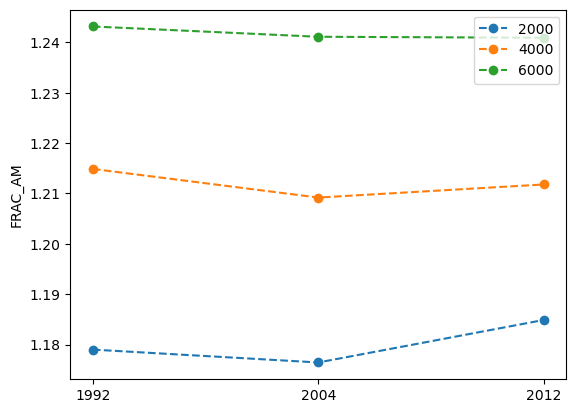

In [ ]:
stba.plot_metric("fractal_dimension_am")

In this case, the legend shows the buffer distance that corresponds to the plotted line.

## Spatiotemporal zonal grid analysis

Finally, we can explore the temporal evolution of landscape metrics over a single regular rectangular grid using the `SpatioTemporalZonalGridAnalysis` class:

In [ ]:
zone_width, zone_height = 2000, 2000  # in this case, in meters

stzga = pls.SpatioTemporalZonalGridAnalysis(
    input_filepaths, zone_width=zone_width, zone_height=zone_height, dates=years
)

/home/martibosch/mambaforge/envs/pylandstats/lib/python3.11/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


Likewise with `ZonalAnalysis` we can also define the number of zones that we desire in each dimension by means of the `num_zone_rows` and `num_zone_cols` keyword arguments of the initialization method.

Again, the functionalities of `SpatioTemporalZonalGridAnalysis` are essentially the same as those of `SpatioTemporalZonalAnalysis` (and `SpatioTemporalBufferAnalysis`) reviewed above:

In [ ]:
class_metrics_df = stzga.compute_class_metrics_df(metrics=metrics)
class_metrics_df.head()

[########################################] | 100% Completed | 1.62 sms


proportion_of_landscape  edge_density  \
class_val grid_cell date                                          
1         2         1992                 9.340659     24.725275   
                    2004                 9.890110     25.274725   
                    2012                12.087912     30.219780   
          3         1992                 2.252252      8.558559   
                    2004                 3.153153     12.162162   

                          fractal_dimension_am  
class_val grid_cell date                        
1         2         1992              1.057659  
                    2004              1.063133  
                    2012              1.081621  
          3         1992              1.027996  
                    2004              1.039994